In [78]:
# load packages
import numpy as np
import pandas as pd
# import napari
import tifffile as tf
from skimage import io # import tiff file as ndarray
import os
import matplotlib.pyplot as plt

# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
# choose based on run in acadia or home computer
# home_dir = "/mnt/labNAS/"
home_dir = "/Volumes/Data/"

metadata = pd.read_csv("stp_metadata.csv")

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/output_figs/"

# add paths to metadata
# make sure to use data aligned to steg/mmus respectively
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "STeg":
        b_path = in_path+"norm_subtracted/STeg_220429_aligned/"+metadata.loc[i,"brain"]+"_aligned_to_STeg_220429_norm_subtracted.tif"
    elif metadata.loc[i,"species"] == "MMus":
        b_path = in_path+"norm_subtracted/MMus_220303_aligned/"+metadata.loc[i,"brain"]+"_aligned_to_MMus_220303_norm_subtracted.tif"
    
    metadata.loc[i,"path"] = b_path

# area list from make_masks.py
areas = ["grey", "CTX", "OMCc", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS"]


In [53]:
# load masks
steg_masks = []
for i in range(len(areas)):
    with open(in_path+"masks/STeg_220429_"+areas[i]+".npy", "rb") as f:
            steg_masks.append(np.load(f))

mmus_masks = []
for i in range(len(areas)):
    with open(in_path+"masks/MMus_220303_"+areas[i]+".npy", "rb") as f:
            mmus_masks.append(np.load(f))

# load images
images = []
for i in range(metadata.shape[0]):
    images.append(tf.imread(metadata.loc[i,"path"]))

# load atlases
st_atlas_path = in_path+"Steg_220429_registered_atlas_RESIZED.tif"
st_atlas = tf.imread(st_atlas_path)

mm_atlas_path = in_path+"MMus_220303_registered_atlas_RESIZED.tif"
mm_atlas = tf.imread(mm_atlas_path)


# quantify integrated fluorescence




## OMC

In [54]:
# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]


# set metadata
meta_omc = metadata[metadata["inj_site"]=="OMC"]
meta_omc = meta_omc.reset_index()

images_omc = [images[i] for i in meta_omc["index"]]

In [84]:
omc_fluor = calc_fluor(images_omc, meta_omc, mm_masks=mmus_masks, st_masks=steg_masks,
                       mask_areas=areas, areas_to_plot=areas_plot)
omc_fluor

,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,7171.27020,13654.68,OMC_MMus_220119_b0,MMus,OMC
1,CP,9100.43614,14563.62,OMC_MMus_220119_b0,MMus,OMC
2,aud,1179.22521,7287.26,OMC_MMus_220119_b0,MMus,OMC
3,AMY,249.29777,1530.72,OMC_MMus_220119_b0,MMus,OMC
4,TH,9282.75416,16941.82,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
61,SNr,309.06559,935.62,OMC_STeg_220429_b2,STeg,OMC
62,SCm,1519.92101,6995.60,OMC_STeg_220429_b2,STeg,OMC
63,PG,164.49987,580.52,OMC_STeg_220429_b2,STeg,OMC
64,PAG,1025.60532,4985.72,OMC_STeg_220429_b2,STeg,OMC


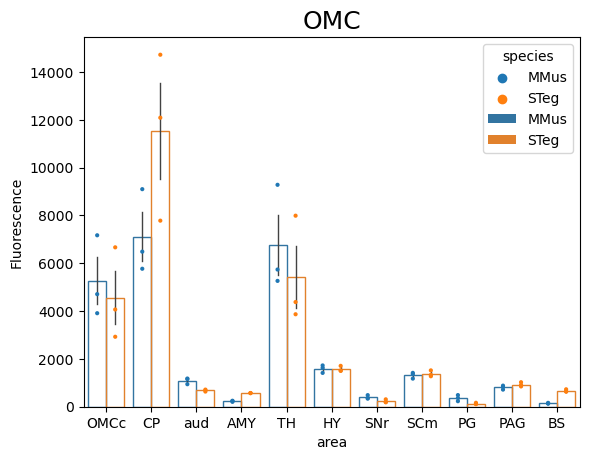

In [86]:
# make dot plot
dot_bar_plot(omc_fluor, title="OMC", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()

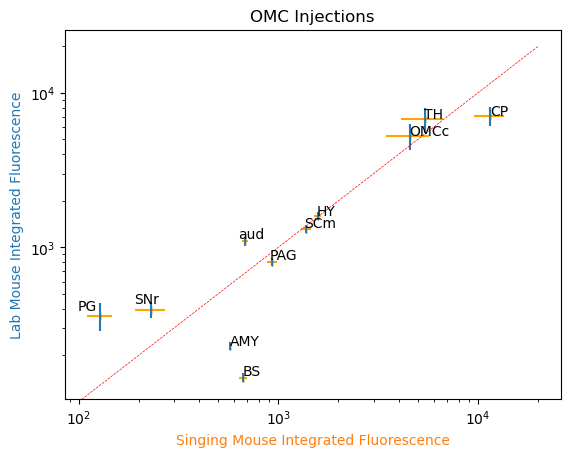

In [85]:
stvmm_area_scatter(omc_fluor, title="OMC Injections")
plt.show()

## ACC

In [91]:
# set areas that match w/ mapseq data
areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

# set metadata
meta_acc = metadata[metadata["inj_site"]=="ACC"]
meta_acc = meta_acc.reset_index()

images_acc = [images[i] for i in meta_acc["index"]]
acc_fluor = calc_fluor(images_acc, meta_acc, mm_masks=mmus_masks, st_masks=steg_masks,
                       mask_areas=areas, areas_to_plot=areas_plot)
# acc_fluor

,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,ACAc,5248.30193,2189.70,ACC_MMus_230403_b1,MMus,ACC
1,CP,898.97977,14563.62,ACC_MMus_230403_b1,MMus,ACC
2,aud,57.49887,7287.26,ACC_MMus_230403_b1,MMus,ACC
3,AMY,13.36358,1530.72,ACC_MMus_230403_b1,MMus,ACC
4,TH,1373.87944,16941.82,ACC_MMus_230403_b1,MMus,ACC
5,HY,720.46067,9030.40,ACC_MMus_230403_b1,MMus,ACC
6,SNr,36.72758,1243.92,ACC_MMus_230403_b1,MMus,ACC
7,SCm,231.67029,5967.72,ACC_MMus_230403_b1,MMus,ACC
8,PG,28.46402,665.94,ACC_MMus_230403_b1,MMus,ACC
9,PAG,249.12830,4766.64,ACC_MMus_230403_b1,MMus,ACC


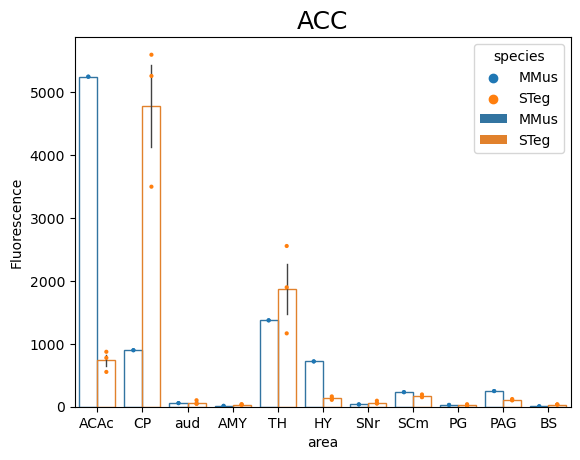

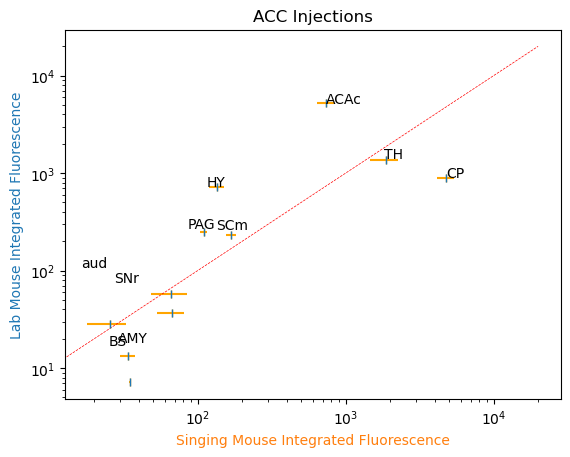

In [92]:

# make dot plot
dot_bar_plot(acc_fluor, title="ACC", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()
stvmm_area_scatter(acc_fluor, title="ACC Injections")
plt.show()